# Aula 11 - Redes neurais

Neste notebook iremos utilizar a biblioteca [Keras](https://www.keras.io) para construir redes neurais.

Faremos dois exemplos: XOR lógico (para classificação) e preço de casas (para regressão).

## Exemplo 1 - XOR lógico

Para começar, precisamos importar algumas bibliotecas.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import to_categorical
from keras.utils import np_utils

Iniciaremos com uma tarefa simples: aprender a função lógica XOR. Para isto, utilizaremos a tabela verdade desta operação como dataset para treinar a rede neural.

A | B | XOR
- | - | -
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

Em particular, utilizaremos as colunas A e B como entradas da rede neural e a coluna XOR como saída. Especificamente, cada exemplo será composto por uma entrada X (par de dois valores representando A e B) e por uma saída y (valor individual representando XOR).

In [0]:
# entradas e saídas referentes à operação lógica XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

Resolveremos a tarefa acima como um problema de classificação. Desta forma, é conveniente codificar a saída de forma categórica (mais detalhes sobre este tipo de procedimento [aqui](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)).

In [0]:
# codifica as saídas de forma categórica
y = np_utils.to_categorical(y)

Na categorização acima, os valores 0 e 1 são representados por [1, 0] e [0, 1], respectivamente. Isto fica evidente ao imprimir a variável.

In [0]:
print(y)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Nosso próximo passo consiste em construir a rede neural. Para isto, utilizaremos o modelo sequencial do Keras. Neste modelo, podemos empilhar as diferentes camadas da rede com bastante facilidade.

In [0]:
# cria um modelo sequencial
model = Sequential()

Após criar o modelo sequencial, podemos empilhar as camadas utilizando a função `add`. Primeiramente, criaremos uma camada de 64 neurônios, cada qual com uma função de ativação do tipo tangente hiperbólica. O parâmetro `input_dim` é necessário para definir a dimensão das entradas.

In [0]:
# 1a camada: 64 neurônios com a mesma entrada com tamanho compatível com a entrada
model.add(Dense(64, activation='tanh', input_dim=X.shape[1]))

Ao final, criaremos uma camada de saída. Considerando que nossas saídas são categóricas, cada qual de dimensão 2, nossa rede também precisa ter duas saídas. Desta forma, criaremos uma camada de saída com dois neurônios, cada qual com uma função de ativação do tipo sigmóide. Note que nesta camada não foi preciso definir a dimensão de entrada; isto acontece porque o Keras define automaticamente a dimensão de entrada dos neurônios de uma camada oculta com base nas saídas da camada anterior.

In [0]:
# 2a camada (saída): 2 neurônios, totalmente conectada
model.add(Dense(2, activation='sigmoid'))

Definida a rede, agora podemos compilar a mesma para gerar o modelo final. Na compilação, devemos definir o algoritmo (`optimizer`) que será utilizado para treinar a rede bem como a função de erro (`loss`) e as métricas (`metrics`). O Keras possui diversos algoritmos de otimização ([lista](https://keras.io/api/optimizers/)), funções de erro ([lista](https://keras.io/api/losses/)) e métricas ([lista](https://keras.io/api/metrics/)). No nosso caso, estamos utilizando métricas e função de erro próprias para a tarefa de classificação. Para otimização, estamos utilizando o `adam`, que é um excelente algoritmo para redes neurais.

In [0]:
# compila o modelo, utilizando a entropia cruzada como função de erro, 
# com o algoritmo Adam, e avaliando o modelo através da métrica acurácia
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["binary_crossentropy", "accuracy"])

Para ter uma visão geral do modelo resultante, podemos imprimir um resumo do mesmo. Note que o modelo criado possui 322 parâmetros. Isto significa que, durante o treinamento, o algoritmo de otimização terá que ajustar o valor de 322 variáveis de modo a reduzir o erro.

In [0]:
# mostra um resumo do modelo compilado
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


Definidos os dados e a rede, agora podemos iniciar o treinamento. Para isto, devemos utilizar a função `fit`, especificando os dados de entrada e saída (no nosso caso, `X` e `y`) e o número de épocas (`epochs`).

In [0]:
# treina o modelo
history = model.fit(X, y, epochs=1000, verbose=0) 

No código acima, armazenamos o retorno do treinamento na variável `history` para poder visualizar a evolução do processo de treinamento. Para isto, podemos plotar o erro ao longo do tempo como segue.

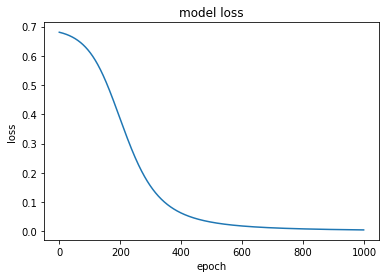

In [0]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Conforme pode ser observado, o erro final é bastante baixo. No entanto, ele só chega a níveis adequados no final do treinamento. 

Da mesma forma que fizemos com o erro, podemos plotar também a acurácia do modelo.

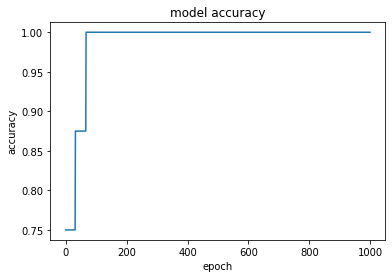

In [0]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Bem como anteriormente, note que a acurácia aumenta com o treinamento do modelo.

Finalmente, agora podemos avaliar nosso modelo. Para isto, utilizaremos a função `evaluate`, que recebe como argumentos dados de entrada (`X`) e saída (`y`) e retorna as métricas anteriormente definidas.

In [0]:
# avalia o modelo
score = model.evaluate(X, y)
print("\nAcurácia: ", score[-1])

# verifica as predições
print("\nPredições:")
pred = model.predict_proba(X)
print(pred)

4/4 [==============================] - 0s 357us/step

Acurácia:  1.0

Predições:
[[0.9956118  0.00387996]
 [0.00456738 0.99577177]
 [0.00527772 0.9953675 ]
 [0.9951901  0.00414902]]


Note que nosso modelo obteve uma acurácia de 100%. Nenhuma surpresa, dado que o problema XOR é bastante simples.

Para melhorar o entendimento, abaixo podemos comparar as saídas da rede com as saídas esperadas.

In [0]:
# imprime as predições de forma mais clara
print("Entrada\t\tSaída esperada\t\tSaída prevista")
for i in range(len(X)):
    print(f"{X[i]}\t\t{y[i]}\t\t\t{[round(v) for v in pred[i]]}")

Entrada		Saída esperada		Saída prevista
[0. 0.]		[1. 0.]			[1.0, 0.0]
[0. 1.]		[0. 1.]			[0.0, 1.0]
[1. 0.]		[0. 1.]			[0.0, 1.0]
[1. 1.]		[1. 0.]			[1.0, 0.0]


## Exemplo 2 - Boston Housing

Para começar, precisamos importar algumas bibliotecas.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.datasets import boston_housing

Neste exemplo, resolveremos a tarefa de regressão. Para isto, utilizaremos o dataset Boston Housing, que contém informações sobre imóveis e seus preços na cidade de Boston (EUA). Este dataset pode ser facilmente importado através da função `boston_housing.load_data`. Esta função retorna duas tuplas, as quais representam os dados de treino (entrada e saída) e de teste (entrada e saída).

In [0]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Para entender melhor estes dados, podemos imprimir uma pequena amostra como segue.

In [0]:
print('Shape dados de treino:   %s'% (train_data.shape,))
print('Shape dados de teste:    %s'% (test_data.shape,))
print('Exemplo de entrada:      %s'% (train_data[0]))
print('Exemplo de saída:        %f'% (train_targets[0]))

Shape dados de treino:   (404, 13)
Shape dados de teste:    (102, 13)
Exemplo de entrada:      [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Exemplo de saída:        15.200000


Para que o modelo aprenda melhor, precisamos realizar um pré-processamento dos dados.

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Definido o dataset, agora podemos criar a rede neural.

Neste exemplo, estamos empilhando três camadas, sendo duas com 64 neurônios cada e uma (de saída) com apenas um neurônio. Note que a camada de saída possui apenas um neurônio porque estamos lidando com a tarefa de regressão.

In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________


Agora podemos treinar o modelo utilizando nosso dataset.

In [0]:
history = model.fit(train_data, train_targets, epochs=2000, verbose=0)

Treinado o modelo, podemos analisar seu desempenho através do gráfico abaixo.

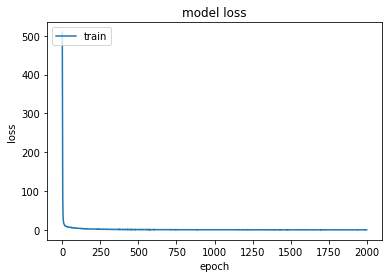

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Para avaliar o modelo, podemos obter o valor do erro como segue.

In [0]:
test_mse_score = model.evaluate(test_data, test_targets)
test_mse_score

102/102 [==============================] - 0s 182us/step


[15.152721554625268, 15.152722358703613]

Note que o erro acima está alto. Mas ainda assim, é uma aproximação razoável.

Podemos ter uma ideia melhor deste erro através do gráfico abaixo. Quanto mais distante da linha, maior o erro.

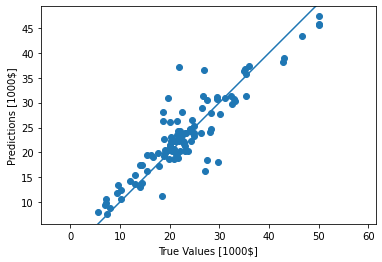

In [0]:
test_predictions = model.predict(test_data).flatten()
plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100],[-100,100])

## Exercícios

### Exercício 1

Repita o exemplo 1 para a expressão lógica abaixo.

![alt text](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/combination-comb25.gif)

#### Modelagem usando os mesmos parâmetros usados no exemplo 1

In [0]:
X = np.array([
              [0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]
]).astype('float32')

y = np.array([[0], [0], [0], [0], [1], [0], [0], [0]]).astype('float32')

y = np_utils.to_categorical(y)

In [0]:
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [0]:
model = Sequential()

model.add(Dense(64, activation='tanh', input_dim=X.shape[1]))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["binary_crossentropy", "accuracy"])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 130       
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X, y, epochs=1000, verbose=0) 

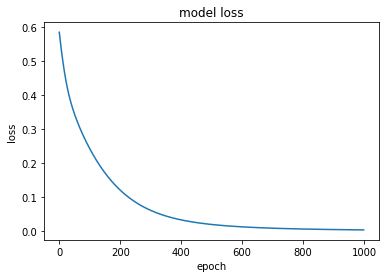

In [0]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

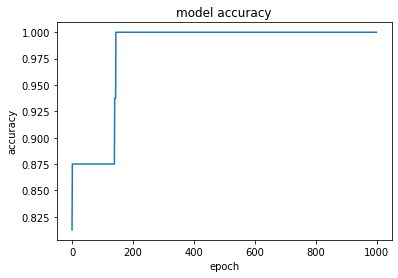

In [0]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [0]:
# avalia o modelo
score = model.evaluate(X, y)
print("\nAcurácia: ", score[-1])

# verifica as predições
print("\nPredições:")
pred = model.predict_proba(X)
print(pred)

8/8 [==============================] - 0s 2ms/step

Acurácia:  1.0

Predições:
[[9.9447173e-01 5.8782995e-03]
 [9.9999797e-01 2.4255924e-06]
 [9.9999803e-01 2.2446695e-06]
 [1.0000000e+00 1.2198366e-08]
 [1.2593597e-02 9.8602122e-01]
 [9.9500823e-01 5.7833791e-03]
 [9.9456584e-01 5.1988363e-03]
 [9.9999809e-01 2.2693991e-06]]


In [0]:
# imprime as predições de forma mais clara
print("Entrada\t\tSaída esperada\t\tSaída prevista")
for i in range(len(X)):
    print(f"{X[i]}\t\t{y[i]}\t\t\t{[round(v) for v in pred[i]]}")

Entrada		Saída esperada		Saída prevista
[0. 0. 0.]		[1. 0.]			[1.0, 0.0]
[0. 0. 1.]		[1. 0.]			[1.0, 0.0]
[0. 1. 0.]		[1. 0.]			[1.0, 0.0]
[0. 1. 1.]		[1. 0.]			[1.0, 0.0]
[1. 0. 0.]		[0. 1.]			[0.0, 1.0]
[1. 0. 1.]		[1. 0.]			[1.0, 0.0]
[1. 1. 0.]		[1. 0.]			[1.0, 0.0]
[1. 1. 1.]		[1. 0.]			[1.0, 0.0]


#### Modelagem usando parâmetros diferentes

Mudei para conter mais uma camada, e as duas ainda possuirem 200 neurônios cada. 

Para a modelagem foi usadado a função de perda `poisson` e para otimização a `adamax`, que se encaixaram melhor que as primeiras usadas.

Por último, foi alterado a quantidade de rodadas para garantir a acurácia em 1 logo início das iterações.

In [0]:
model = Sequential()

model.add(Dense(200, activation='tanh', input_dim=X.shape[1]))
model.add(Dense(200, activation='tanh'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss="poisson", optimizer="adamax", metrics = ["binary_crossentropy", "accuracy"])
history = model.fit(X, y, epochs=2000, verbose=0) 
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 200)               800       
_________________________________________________________________
dense_58 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 402       
Total params: 41,402
Trainable params: 41,402
Non-trainable params: 0
_________________________________________________________________


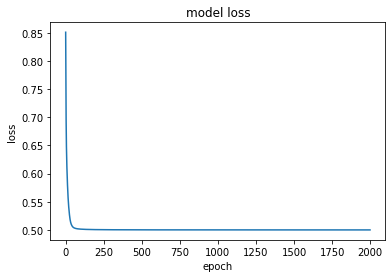

In [0]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

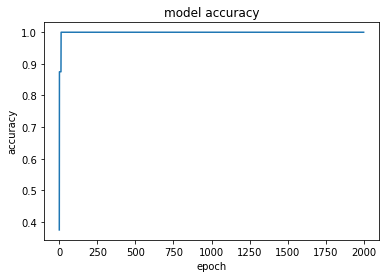

In [0]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [0]:
# avalia o modelo
score = model.evaluate(X, y)
print("\nAcurácia: ", score[-1])

# verifica as predições
print("\nPredições:")
pred = model.predict_proba(X)
print(pred)

8/8 [==============================] - 0s 3ms/step

Acurácia:  1.0

Predições:
[[9.9971521e-01 5.5489309e-05]
 [1.0000000e+00 3.5565890e-09]
 [1.0000000e+00 3.3997463e-09]
 [1.0000000e+00 1.4996764e-10]
 [5.6229670e-05 9.9568844e-01]
 [9.9671674e-01 1.4502803e-05]
 [9.9684745e-01 1.4425763e-05]
 [1.0000000e+00 1.7092356e-09]]


In [0]:
# imprime as predições de forma mais clara
print("Entrada\t\tSaída esperada\t\tSaída prevista")
for i in range(len(X)):
    print(f"{X[i]}\t\t{y[i]}\t\t\t{[round(v) for v in pred[i]]}")

Entrada		Saída esperada		Saída prevista
[0. 0. 0.]		[1. 0.]			[1.0, 0.0]
[0. 0. 1.]		[1. 0.]			[1.0, 0.0]
[0. 1. 0.]		[1. 0.]			[1.0, 0.0]
[0. 1. 1.]		[1. 0.]			[1.0, 0.0]
[1. 0. 0.]		[0. 1.]			[0.0, 1.0]
[1. 0. 1.]		[1. 0.]			[1.0, 0.0]
[1. 1. 0.]		[1. 0.]			[1.0, 0.0]
[1. 1. 1.]		[1. 0.]			[1.0, 0.0]


### Exercício 2

Construa um modelo capaz de fazer o reconhecimento de dígitos do dataset MNIST ([link](https://keras.io/api/datasets/mnist/)).

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.model_selection import KFold
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print('Shape dados de treino:   in: %s      out: %s'% (train_data.shape, train_targets.shape))
print('Shape dados de teste:    in: %s      out: %s'% (test_data.shape, test_targets.shape))
print('Exemplo de entrada:      %s'% (train_data[0]))
print('Exemplo de saída:        %f'% (train_targets[0]))

Shape dados de treino:   in: (60000, 28, 28)      out: (60000,)
Shape dados de teste:    in: (10000, 28, 28)      out: (10000,)
Exemplo de entrada:      [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   

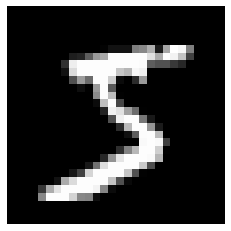

In [27]:
for i in range(2):
	plt.axis("off")
	plt.imshow(train_data2[i], cmap=plt.get_cmap('gray'))
	plt.savefig('sample_' + str(i) + '.png')
plt.show()

Usando `reshape` para ter um único canal de cores.

In [0]:
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

Visto que possuímos 10 classes, separadas em números inteiros, podemos então aplicar a técnica de *hot encoding* e transformar em um vetor binário, onde 1 sempre vai representar uma classe.

In [0]:
train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)

O dataset possui inteiros entre 0 e 255, contudo, não é uma boa prática usar esta escala para modelagem, então é necessário mudar a escala. 
Para isso normalizamos os pixels para escala de cinza, sendo usado o range [0,1].
Nesse processo devemos então mudar os dados de inteiros para decimais, e dividir pelo maior valor, que no caso é 255.

In [0]:
# convert from integers to floats
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
# normalize to range 0-1
train_data = train_data / 255.0
test_data = test_data / 255.0

#### Modelo

Para definir o modelo, segundo a literatura, é importante se preocupar com dois aspectos: extração de recursos que é composta por camadas convolucionais e de pool (agrupamento), e o backend para fazer a predição.

Na modelagem, é usado uma camada convolucional com um filtro de 3x3, seguido por um pool de 2x2. Uma camada densa de 100 neurônios. E uma saída com 10 neurônios, já possuímos 10 classes de saída.

Para copilar o modelo, foi usada uma configuração para otimizar a descida de gradiente, com taxa de aprendizado de 0,01 e peso de 0,9.

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

#### Avaliação

Para realizar a avaliação, é usado um método chamado [five-fold cross-validation](https://https://machinelearningmastery.com/k-fold-cross-validation/). Foi usado então o valor k=5 como baseline para repetir a avaliação e não gerar uma execução tão longa.
Cada teste é setado para 20% do dataset de treino (nesse caso fica em 12.000 amostras). 

Para realizar a divisão dos dados de treino, usando k, é embaralhado de forma a garantir que os dados não estarão repetidos em cada dataset (treino e teste) de cada *k fold*.

É treinado então para 10 épocas com um batch de 32 exemplos. O set de teste então será utilizado para avaliar o modelo em cada época (permitindo criar uma curva de aprendizado) e no final da avaliação (possibilita um histórico de cada execução, assim como a acurácia de cada k).

In [9]:
n_folds=5

scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_data):
	# define model
	model = define_model()
	# select rows for train and test
	trainX, trainY, testX, testY = train_data[train_ix], train_targets[train_ix], train_data[test_ix], train_targets[test_ix]
	# fit model
	history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# stores scores
	scores.append(acc)
	histories.append(history)

> 98.483
> 98.442
> 98.600
> 98.725
> 98.733


Abaixo foi extraído o comportamento do modelo durante o treinamento e uma estimativa de performance do mesmo.

Os gráficos abaixo mostram a perda (Entropy Loss) e acurácia (Classification Accuracy).

Azul indica avaliação realizada sobre o dataset de treino, e laranja sobre o dataset de treino.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


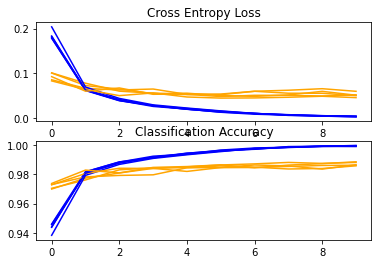

In [0]:
for i in range(len(histories)):
	# plot loss
	plt.subplot(2, 1, 1)
	plt.title('Cross Entropy Loss')
	plt.plot(histories[i].history['loss'], color='blue', label='train')
	plt.plot(histories[i].history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(2, 1, 2)
	plt.title('Classification Accuracy')
	plt.plot(histories[i].history['accuracy'], color='blue', label='train')
	plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

Para a acurácia, ainda podemos classificar a média e desvio padrão. Isso fornece uma estimativa da performance média esperada do modelo treinado. 

Por fim, plotamos um gráfico whisker plot.

Accuracy: mean=98.717 std=0.109, n=5


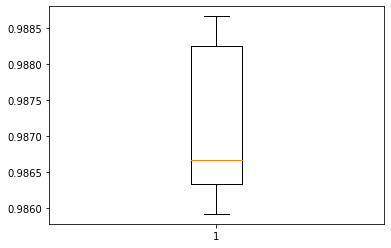

In [0]:
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

Como podemos ver nas avaliações realizadas, o modelo avaliou com algo por volta de 98 (ou 0.98 para 1). Podemos então fazer algumas mudanças na modelagem para ter resultados melhores.

Um deles é aumentar a profundidade da cnn adicionando mais convolucional e pool layers.

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [8]:
n_folds=5

scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_data):
	# define model
	model = define_model()
	# select rows for train and test
	trainX, trainY, testX, testY = train_data[train_ix], train_targets[train_ix], train_data[test_ix], train_targets[test_ix]
	# fit model
	history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# stores scores
	scores.append(acc)
	histories.append(history)

> 99.067
> 99.033
> 98.850
> 99.075
> 98.983


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


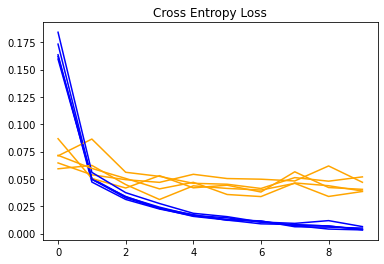

In [10]:
for i in range(len(histories)):
	# plot loss
	plt.subplot(1, 1, 1)
	plt.title('Cross Entropy Loss')
	plt.plot(histories[i].history['loss'], color='blue', label='train')
	plt.plot(histories[i].history['val_loss'], color='orange', label='test')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


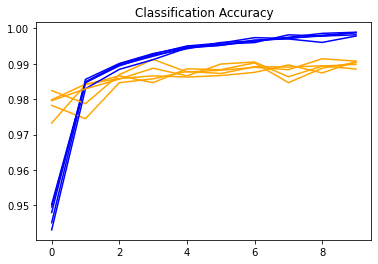

In [11]:
for i in range(len(histories)):
	# plot accuracy
	plt.subplot(1, 1, 1)
	plt.title('Classification Accuracy')
	plt.plot(histories[i].history['accuracy'], color='blue', label='train')
	plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

Accuracy: mean=99.002 std=0.082, n=5


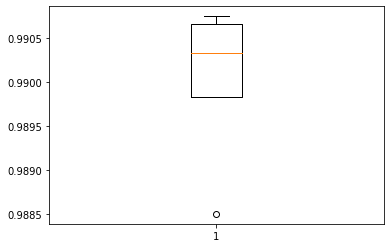

In [12]:
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

Logo, podemos notar que com o aumento de camadas na cnn, conseguimos um aumento significativo na acurácia da rede.

#### Finalizando o modelo

Já com o modelo finalizado, usaremos ele para conjunto de treinamento.

In [0]:
model.fit(train_data, train_targets, epochs=10, batch_size=32, verbose=0)
model.save('final_model.h5')

Agora podemos avaliar o modelo usando o dataset de teste.

In [14]:
model_loaded = load_model('final_model.h5')
# evaluate model on test dataset
_, acc = model_loaded.evaluate(test_data, test_targets, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.140


#### Fazendo predição usando imagens

Para o modelo criado, prevê que a imagem seja em escala de cinza, alinhada contendo uma escrita do digito, e que a imagem tenha tamanho de 28x28 pixels.

O código abaixo irá mostrar isso, carregando uma imagem e setando ela para o tamanho necessário, mudando para ter apenas um canal.
É importante ser feito isso porque o modelo foi treinado com essas características, logo as imagens que são usadas para predizer, também devem estar no mesmo formato.

In [0]:
def load_image(filename):
	img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	# normalizing data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [71]:
# predict the class
img = load_img("digit_7.png")
digit = model_loaded.predict_classes(img)
print(digit[0])

7
